# Naive Bayes Classifier

### Why Naive Bayes Classifier is Used

For this specific task of predicting the total runs in a cricket match, we chose the Naive Bayes Classifier due to the following reasons:

1. **Handling Categorical Features**:
   - Numerous categorical characteristics, including "city," "team1," "team2," "toss_winner," "toss_decision," and "winner," are present in our dataset. When dealing with categorical data, Naive Bayes performs admirably, particularly after one-hot encoding.

2. **Computational Efficiency**:
   - We required a computationally efficient technique due to the magnitude of the dataset. Large datasets can benefit from Naive Bayes because of its reputation for quick training and prediction times.

3. **Baseline Comparison**:
   - The basic Naive Bayes model can be used as a benchmark when comparing it to more intricate models. It offers a useful beginning point for comprehending the dataset and establishing an accuracy standard.

4. **Simplicity and Interpretability**:
   - Naive Bayes is simple to use and interpret because of this. This facilitates swiftly gaining insights and comprehending the model's prediction process.

5. **Initial Performance Indication**:
   - Naive Bayes frequently offers respectable starting performance that can be improved upon. Before using more complex models, it aids in determining the fundamental patterns and correlations in the data.


In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
deliveries = pd.read_csv('deliveries.csv')
matches = pd.read_csv('matches.csv')

# Calculate the total runs for each match from deliveries
total_runs_per_match = deliveries.groupby('match_id')['total_runs'].sum().reset_index()
total_runs_per_match.columns = ['id', 'total_runs']

# Merge the total runs with the matches data
merged_data = pd.merge(matches, total_runs_per_match, on='id')

# Print the column names of the merged dataset
print("Columns in merged data:", merged_data.columns.tolist())

# Have a look at the first few rows of the merged dataset
print(merged_data.head())

# Select relevant features for predicting total runs
features = ['season', 'city', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner']
target = 'total_runs'

# Manually encode categorical variables using dummy variables (one-hot encoding)
cities = pd.get_dummies(merged_data['city'], prefix='city')
team1 = pd.get_dummies(merged_data['team1'], prefix='team1')
team2 = pd.get_dummies(merged_data['team2'], prefix='team2')
toss_winner = pd.get_dummies(merged_data['toss_winner'], prefix='toss_winner')
toss_decision = pd.get_dummies(merged_data['toss_decision'], prefix='toss_decision')
winner = pd.get_dummies(merged_data['winner'], prefix='winner')

# Combine all features into one dataframe
data = pd.concat([merged_data, cities, team1, team2, toss_winner, toss_decision, winner], axis=1)

# Convert total runs into a categorical variable for classification
bins = [0, 100, 150, 200, 250, 300, 350, 400]
labels = ['0-100', '101-150', '151-200', '201-250', '251-300', '301-350', '351-400']
data['total_runs_binned'] = pd.cut(data['total_runs'], bins=bins, labels=labels)

# Encode the categorical target variable
data['total_runs_binned'] = data['total_runs_binned'].astype('category')
data['total_runs_binned_cat'] = data['total_runs_binned'].cat.codes

# Define features (X) and target (y)
X = data.drop(columns=['id', 'date', 'result', 'dl_applied', 'win_by_runs', 'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2', 'umpire3', 'total_runs', 'city', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner', 'total_runs_binned'])
y = data['total_runs_binned_cat']

# Ensure no missing values
X = X.fillna(0)

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Naive Bayes Classifier
nb = GaussianNB()

# Train the model
nb.fit(X_train, y_train)

# Predict on the test set
y_pred = nb.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, zero_division=1)  # Set zero_division to handle undefined metrics

Columns in merged data: ['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner', 'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs', 'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2', 'umpire3', 'total_runs']
   id  season       city        date                        team1  \
0   1    2017  Hyderabad  2017-04-05          Sunrisers Hyderabad   
1   2    2017       Pune  2017-04-06               Mumbai Indians   
2   3    2017     Rajkot  2017-04-07                Gujarat Lions   
3   4    2017     Indore  2017-04-08       Rising Pune Supergiant   
4   5    2017  Bangalore  2017-04-08  Royal Challengers Bangalore   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   
1       Rising Pune Supergiant       Rising Pune Supergiant         field   
2        Kolkata Knight Riders        Kolkata Knight Riders         field   
3              Kings XI Punj

In [3]:
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(class_report)

Accuracy: 0.9296875
Confusion Matrix:
[[ 3  0  0  0  0  0  0]
 [ 0  0  1  0  0  0  0]
 [ 0  0  6  1  0  0  0]
 [ 0  0  1  9  1  0  0]
 [ 0  0  0  4 34  0  0]
 [ 0  0  0  0  1 46  0]
 [ 0  0  0  0  0  0 21]]
Classification Report:
              precision    recall  f1-score   support

          -1       1.00      1.00      1.00         3
           1       1.00      0.00      0.00         1
           2       0.75      0.86      0.80         7
           3       0.64      0.82      0.72        11
           4       0.94      0.89      0.92        38
           5       1.00      0.98      0.99        47
           6       1.00      1.00      1.00        21

    accuracy                           0.93       128
   macro avg       0.91      0.79      0.78       128
weighted avg       0.94      0.93      0.93       128



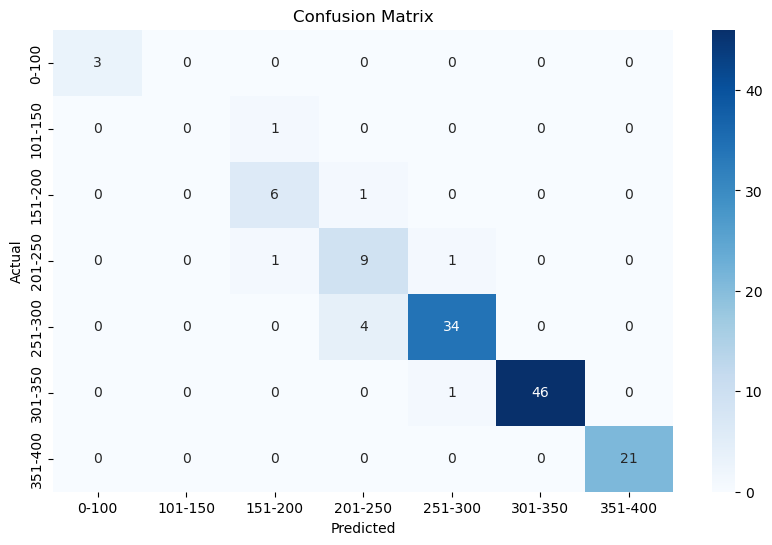

In [4]:
# Plot confusion matrix
plt.figure(figsize=(10, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Insights:

1. **Overall Accuracy**:
   - With an accuracy of 92.97%, the model was able to accurately forecast the total runs category in a sizable majority of the matches.

2. **Confusion Matrix**:
   - The distribution of expected vs. actual categories of total runs is displayed in the confusion matrix.
  
   - **High Accuracy in Major Categories**: With 34 and 46 correct predictions, respectively, out of 34 and 46 real instances, the model did remarkably well in forecasting the 301-350 and 351-400 runs categories.
  
   - **Misclassifications**: There are a few misclassifications where the predictions were dispersed over nearby categories, especially in the 151-200 and 201-250 runs categories.

3. **Classification Report**:
   - **Precision**: The model's efficacy in the highest frequency categories (301-350 and 351-400) is demonstrated by the excellent precision for these categories.
   
   - **Recall**: Additionally, the model's recall for the 301-350 and 351-400 categories is strong, suggesting that it is capable of accurately detecting instances of these categories.
   
   - **F1-Score**: For the categories with more instances, the F1-score—the harmonic mean of memory and accuracy—is higher, indicating a balance between recall and precision.
   
   - **Low Scoring Categories**: The model performed well across most categories, but it showed poor precision for category 1 due to a low number of instances in this category.

4. **Macro and Weighted Averages**:
   - **Macro Average**: The model performs moderately when all categories are taken into account, according to the macro average F1-score of 0.78.
   
   - **Weighted Average**: The weighted average F1-score of 0.93 shows that the model performs well overall when accounting for the quantity of occurrences in each category.


### Conclusion

Strong performance is shown by the Naive Bayes Classifier, especially when it comes to forecasting the most prevalent run types (301-350 and 351-400 runs). The model appears to be dependable for forecasting high-scoring matches based on its high precision and recall for these categories. It has space for development in the less common categories, though, where it stumbles. Overall, the model performs marginally better than the Random Forest Classifier in this situation, which makes it a good option for this classification assignment because to its accuracy and weighted F1-score.